Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Data Pre-processing**

Exploring the dataframe, we had a view on the dataframe regarding:
- First few rows of the dataframe
- Missing Variable
- Datatypes of variables
- Variety of categorical variables

**First few rows of dataframe**

The first few rows of the data looks like:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ADS2001 project/data/virtualInternshipData_ADS2001.csv', encoding = 'ISO-8859-1')
df.head(2)

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19180 entries, 0 to 19179
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             19180 non-null  int64 
 1   userIDs                                19180 non-null  int64 
 2   implementation                         19180 non-null  object
 3   Line_ID                                19180 non-null  int64 
 4   ChatGroup                              19180 non-null  object
 5   content                                19180 non-null  object
 6   group_id                               19180 non-null  int64 
 7   RoleName                               19177 non-null  object
 8   roomName                               19180 non-null  object
 9   m_experimental_testing                 19180 non-null  int64 
 10  m_making_design_choices                19180 non-null  int64 
 11  m_asking_questi

In [ ]:
df.describe()

,Unnamed: 0,userIDs,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
count,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000
mean,9590.500000,202.433212,9592.793796,3.916736,0.028728,0.102868,0.187018,0.018144,0.052242,0.021064,3.741606,12.489520
std,5536.933417,118.355170,5537.800672,1.397935,0.167045,0.303794,0.389936,0.133475,0.222520,0.143600,1.464839,14.117233
min,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4795.750000,96.000000,4796.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000
50%,9590.500000,204.000000,9593.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000
75%,14385.250000,317.000000,14388.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.000000
max,19180.000000,393.000000,19183.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1032.000000


**Data Type**

We explored the datatype.

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
userIDs,int64
implementation,object
Line_ID,int64
ChatGroup,object
content,object
group_id,int64
RoleName,object
roomName,object
m_experimental_testing,int64


**Missing Variable**

Also, we explored the existence of missing variables in the dataset

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Unnamed: 0,0
userIDs,0
implementation,0
Line_ID,0
ChatGroup,0
content,0
group_id,0
RoleName,3
roomName,0
m_experimental_testing,0


We searched out rows whichever `RoleName` is `NA`

In [ ]:
na_indices = df[df.isna().any(axis=1)].index

# Display rows with missing values
df.loc[na_indices]

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
7765,7766,158,f,7769,PSF,Checking in,4,NaN,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,0,2
7771,7772,158,f,7775,PSF,"Hey, I'm Rylee",4,NaN,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,0,3
7801,7802,158,f,7805,PSF,I completed the interview but I can't find whe...,4,NaN,Graphing Surfactant Data,0,0,0,0,0,0,0,12


Since the userIDs who talking at the moment visible, we could search up for the value by tracing `userIDs` and replace it with the `RoleName` of that `userIDs`

In [ ]:
df[df['userIDs'] == 158]['RoleName']

,RoleName
7765,NaN
7771,NaN
7801,NaN


Unfortunately, based on the shown data we are still unable to identify which `RoleName` does that user belongs to. We have to see whichever other approach is able to trace the role of this user.

In [ ]:
mentor = df[df['RoleName'] == 'Mentor'][['userIDs', 'group_id', 'RoleName', 'OutcomeScore']].drop_duplicates().sort_values('userIDs')
mentor['OutcomeScore'].unique()

array([4])

We found that all Mentor are given a mark of 4. Meanwhile that user were given a mark of 0; and based on the content mentioned by that user, we could confirm that this user is a `Player`.

In [ ]:
df.loc[df['userIDs'] == 158, 'RoleName'] = "Player"
df[df['userIDs'] == 158]['RoleName']

,RoleName
7765,Player
7771,Player
7801,Player


In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Unnamed: 0,0
userIDs,0
implementation,0
Line_ID,0
ChatGroup,0
content,0
group_id,0
RoleName,0
roomName,0
m_experimental_testing,0


Then, we explored the variety of categorical variables

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")

Unique values in implementation:
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']


Unique values in ChatGroup:
['PRNLT' 'PMMA' 'PSF' 'PAM' 'PESPVP']


Unique values in content:
['Hello team. Welcome to Nephrotex!'
 "I'm Maria Williams. I'll be your design advisor for your internship."
 "I'm here to help if you have any questions." ...
 'Our material performed well for and maximized marketability since even the prototypes that performed weaker still met the requirements of the consultants easily. Also, reliability seemed to perform well.'
 'Our material gave good flux and reliability values but only when a high CNT percentage was used.'
 'I agree with Michael and Tyler.']


Unique values in RoleName:
['Mentor' 'Player']


Unique values in roomName:
['Introduction and Workflow Tutorial with Entrance Interview'
 'Background research on dialysis' 'Graphing Surfactant Data'
 'Reflection team discussion of surfactants'
 'Summarize internal consultant requirements'
 'Choose cons

### Grouping

Upon exploration, we found that:
1. A `Mentor` can participate in multiple groups.
2. Each `Player` is restricted to joining only one specific group.
3. The `group_id` alone is not unique; the actual unique identifier should be a combination of `group_id` and `implementation`.
4. The `Line_ID` column can be removed.
5. Each unique combination of `group_id` and `implementation` corresponds to a distinct `ChatGroup`, but `ChatGroup` itself may repeat. Therefore, `ChatGroup` can be dropped.
6. All `Mentor` entries are assigned a mark of `4`.
7. Each unique combination of `group_id` and `implementation` contains all `roomName` values. When aggregating, the data should be grouped by the real `group id`, followed by `roomName`. All other ID columns, can be dropped when aggregating to team-based statistics.

Therefore, we did the following:

In [ ]:
df = df.copy()
df['Unnamed: 0'] = df['group_id'].astype(str) + df['implementation'].astype(str)
df = df.rename(columns={'Unnamed: 0': 'groupIDs'})
df = df[['groupIDs', 'roomName', 'RoleName', 'userIDs', 'content','m_experimental_testing', 'm_making_design_choices', 'm_asking_questions', 'j_customer_consultants_requests',	'j_performance_parameters_requirements',	'j_communication',	'OutcomeScore',	'wordCount']]
df.head()

,groupIDs,roomName,RoleName,userIDs,content,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,2a,Introduction and Workflow Tutorial with Entran...,Mentor,1,Hello team. Welcome to Nephrotex!,0,0,0,0,0,0,4,5
1,2a,Introduction and Workflow Tutorial with Entran...,Mentor,1,I'm Maria Williams. I'll be your design adviso...,0,0,0,0,0,0,4,11
2,2a,Introduction and Workflow Tutorial with Entran...,Mentor,1,I'm here to help if you have any questions.,0,0,0,0,0,0,4,9
3,2a,Introduction and Workflow Tutorial with Entran...,Mentor,1,Please introduce yourselves with the name you ...,0,0,0,1,0,0,4,51
4,2a,Introduction and Workflow Tutorial with Entran...,Mentor,1,I just want to make sure everyone has found th...,0,0,0,0,0,0,4,39


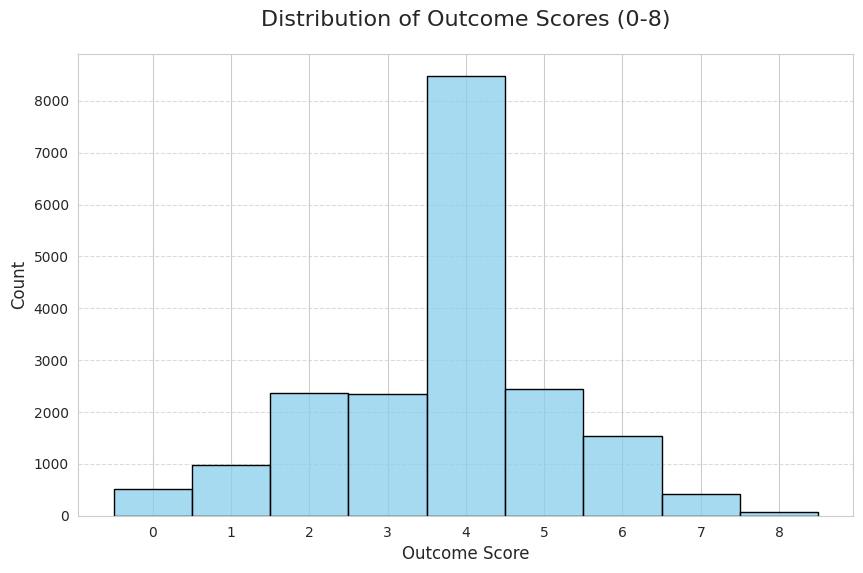

In [ ]:
# Set style
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="OutcomeScore",
    bins=9,  # One bin per score (0-8)
    binrange=(-0.5, 8.5),  # Ensures alignment with integer scores
    kde=False,  # Disable Kernel Density Estimate (since data is discrete)
    color="skyblue",
    edgecolor="black",
)

# Customize plot
plt.title("Distribution of Outcome Scores (0-8)", fontsize=16, pad=20)
plt.xlabel("Outcome Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(range(9))  # Force x-axis to show all possible scores (0-8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-43-edd657f5baf5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.values, y=proportions.index, palette="viridis")


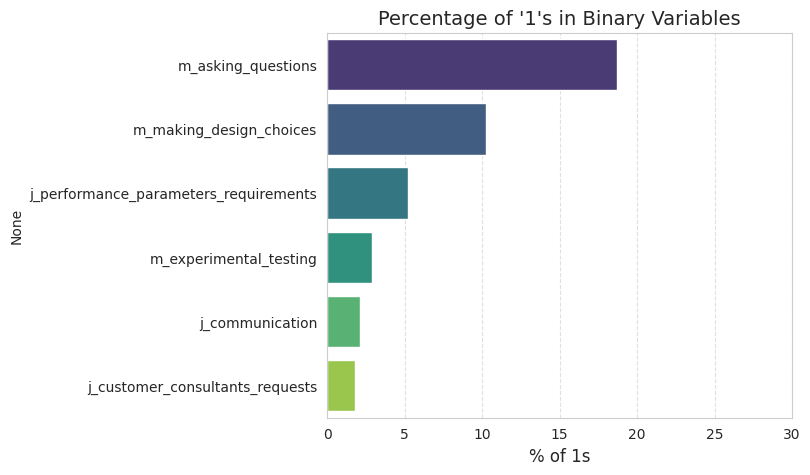

In [ ]:
binary_cols = [
    'm_experimental_testing',
    'm_making_design_choices',
    'm_asking_questions',
    'j_customer_consultants_requests',
    'j_performance_parameters_requirements',
    'j_communication'
]
# Calculate proportions (mean of binary = % of 1s)
proportions = df[binary_cols].mean().sort_values(ascending=False) * 100

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=proportions.values, y=proportions.index, palette="viridis")
plt.title("Percentage of '1's in Binary Variables", fontsize=14)
plt.xlabel("% of 1s", fontsize=12)
plt.xlim(0, 30)  # Ensure scale is 0-100%
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#df.to_csv(path_or_buf='/content/drive/MyDrive/ADS2001 project/data/virtualInternshipData_preprocessed.csv', index=False)